## QUALITY METRICS FOR MACHINE LEARNING ALGORITHMS
#### École d'ingénieurs Léonard de Vinci, La Défense, Paris
**Hugo Alatrista Salas** 

**Note:** This is a graded job (9 points).
***

# Building a classification model

In this lab, we must train a model to learn the different types (or genera) of animals (mammals, fish, insects, etc.). To do this, we will use the dataset called *zoo.csv* proposed by Richard Forsyth in 1990. To build our model, we will use Python and Scikit-learn. Scikit-learn is the most widespread and used Python Machine Learning library. This library includes the implementation of a large number of learning algorithms, within which we can find classification algorithms, feature extraction, regressions, clustering, dimension reduction, pre-processing, among others.

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

We read the data set *zoo.csv* and save the data in a variable called *train_df*.

In [2]:
#from google.colab import files
#uploaded = files.upload()
train_df = pd.read_csv('data/zoo.csv', sep=",", decimal=".", engine='python')

We show information about the data (variables and some lines)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hair      101 non-null    bool  
 1   feathers  101 non-null    bool  
 2   eggs      101 non-null    bool  
 3   milk      101 non-null    bool  
 4   airborne  101 non-null    bool  
 5   aquatic   101 non-null    bool  
 6   predator  101 non-null    bool  
 7   toothed   101 non-null    bool  
 8   backbone  101 non-null    bool  
 9   breathes  101 non-null    bool  
 10  venomous  101 non-null    bool  
 11  fins      101 non-null    bool  
 12  legs      101 non-null    int64 
 13  tail      101 non-null    bool  
 14  domestic  101 non-null    bool  
 15  catsize   101 non-null    bool  
 16  type      101 non-null    object
dtypes: bool(15), int64(1), object(1)
memory usage: 3.2+ KB


In [4]:
train_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


Next, we build two vectors, one containing the classes (*class_feature*) and another containing the attributes or features (*features*). Then, classes are stored in the column called *type* (type of animal), which will be the attribute we want to predict. It is important to remember that we will store the data in arrays.

In [5]:
class_feature = train_df["type"].values

In [6]:
class_feature

array(['mammal', 'mammal', 'fish', 'mammal', 'mammal', 'mammal', 'mammal',
       'fish', 'fish', 'mammal', 'mammal', 'bird', 'fish', 'invertebrate',
       'invertebrate', 'invertebrate', 'bird', 'mammal', 'fish', 'mammal',
       'bird', 'bird', 'mammal', 'bird', 'insect', 'amphibian',
       'amphibian', 'mammal', 'mammal', 'mammal', 'insect', 'mammal',
       'mammal', 'bird', 'fish', 'mammal', 'mammal', 'bird', 'fish',
       'insect', 'insect', 'bird', 'insect', 'bird', 'mammal', 'mammal',
       'invertebrate', 'mammal', 'mammal', 'mammal', 'mammal', 'insect',
       'amphibian', 'invertebrate', 'mammal', 'mammal', 'bird', 'bird',
       'bird', 'bird', 'fish', 'fish', 'reptile', 'mammal', 'mammal',
       'mammal', 'mammal', 'mammal', 'mammal', 'mammal', 'mammal', 'bird',
       'invertebrate', 'fish', 'mammal', 'mammal', 'reptile',
       'invertebrate', 'bird', 'bird', 'reptile', 'invertebrate', 'fish',
       'bird', 'mammal', 'invertebrate', 'fish', 'bird', 'insect',
      

Conversely, for constructing the feature vector (or attribute vector) we create a vector called *features* and save the features we want to use (all attributes for our example). In this work, we show two ways to do it.


In [7]:
# First way
columns = ["hair","feathers","eggs","milk","airborne", "aquatic", "predator","toothed","backbone","breathes","venomous",
           "fins","legs","tail","domestic","catsize"]
features = train_df[list(columns)].values

In [8]:
features

array([[True, False, False, ..., False, False, True],
       [True, False, False, ..., True, False, True],
       [False, False, True, ..., True, False, False],
       ...,
       [True, False, False, ..., True, False, True],
       [False, False, True, ..., False, False, False],
       [False, True, True, ..., True, False, False]], dtype=object)

In [9]:
# Second way
columns = list(train_df.columns[:16])
features = train_df[list(columns)].values

In [10]:
features

array([[True, False, False, ..., False, False, True],
       [True, False, False, ..., True, False, True],
       [False, False, True, ..., True, False, False],
       ...,
       [True, False, False, ..., True, False, True],
       [False, False, True, ..., False, False, False],
       [False, True, True, ..., True, False, False]], dtype=object)

### Classification using the KNN algorithm

As we saw earlier, pre-processing the data is arduous (and we already had a table). Now, we can use a classification algorithm to "guess" a class, which in our case is the type of animal. To this aim, we use the KNN method (*k* next neighbors), which is implemented in the Scikit-learn library. First, we start with the *KNeighborsClassifier* module from the *sklearn.neighbors* library. Then, we create the *neigh* variable that will store our model.

Info: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
# The n_neighbors parameter defines the number of neighbors to be taken into account when assigning a class.
neigh.fit(features, class_feature)

KNeighborsClassifier(n_neighbors=3)

### Classification using decision trees

We can use another method to classify our data, for example, a decision tree. We import the *tree* module from the *tree* library. Then, we create the variable *clf* to store our model (a tree).

Info: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# The criterion parameter allows you to define the function to measure the gain (Entropy)
# The max_depth parameter allows you to define the maximum depth of the tree
# If the variable *max_depth=none*, then the tree will be built until
# It has terminal nodes (leaves) without limiting the number of branches built
clf = clf.fit(features, class_feature)

We first import the tool (*tree* or *KNeighborsClassifier*) from the *sklearn* (Scikit-learn) library in the two codes above. Then, we create an instance of the library using specific parameters which depend on the algorithm. Finally, we build the model by using the created instance over our two vectors: the features (*features*) and the classes (*class_feature*).

### Predicting new instances

Let's imagine that a set of 15 new individuals were captured and we need to predict the class (type) of animal they belong to (mammals, fish, insects, etc.). The characteristics of these individuals are stored in a file called *zoo_test.csv*. By looking at the content of this file (doing a *head()*, for example), we can notice that the value of the last attribute ("type") is unknown ("?"), that is, the classes have yet to be discovered. We will use models created in the previous section to make the prediction. It is important to notice that the training data *zoo.csv* and the test data *zoo_test.csv* must have the same number and value type of attributes (but without the classes).

TIP: At first glance, the 15 animals discovered were described as a wild boar, a catfish, a crab, a Dracula, a flamingo, a frog, a fruit bat, a griffin, a penguin, a pheasant, a sea snake, a sea wasp, a titi monkey, a unicorn, and a wasp.

Then, we read the dataset *zoo_test.csv* and saved the data in a variable called *test_df*. Later, some data characteristics (attributes, data types) will be displayed.

In [13]:
#from google.colab import files
#uploaded = files.upload()
test_df = pd.read_csv('data/zoo_test.csv', sep=",", decimal=".", engine='python')

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hair      15 non-null     bool  
 1   feathers  15 non-null     bool  
 2   eggs      15 non-null     bool  
 3   milk      15 non-null     bool  
 4   airborne  15 non-null     bool  
 5   aquatic   15 non-null     bool  
 6   predator  15 non-null     bool  
 7   toothed   15 non-null     bool  
 8   backbone  15 non-null     bool  
 9   breathes  15 non-null     bool  
 10  venomous  15 non-null     bool  
 11  fins      15 non-null     bool  
 12  legs      15 non-null     int64 
 13  tail      15 non-null     bool  
 14  domestic  15 non-null     bool  
 15  catsize   15 non-null     bool  
 16  type      15 non-null     object
dtypes: bool(15), int64(1), object(1)
memory usage: 597.0+ bytes


In [15]:
test_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,?
1,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,?
2,False,False,True,False,False,True,True,False,False,False,False,False,4,False,False,False,?
3,True,True,False,True,True,False,True,True,True,True,False,False,2,False,False,False,?
4,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,True,?


The *type* column has unknown values ​​(represented by *?*). This column is the one we want to "guess" or predict (the correct word is classify). So, we don't need it for the moment. Remove this line using the *drop* method of the *dataframes* and save the data in a new variable (e.g. *testdata*)

In [16]:
testdata = test_df.drop('type', axis=1)

In [17]:
testdata

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True
1,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False
2,False,False,True,False,False,True,True,False,False,False,False,False,4,False,False,False
3,True,True,False,True,True,False,True,True,True,True,False,False,2,False,False,False
4,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,True
5,False,False,True,False,False,True,True,True,True,True,True,False,4,False,False,False
6,True,False,False,True,True,False,False,True,True,True,False,False,2,True,False,False
7,True,False,False,True,True,False,False,True,True,True,False,False,2,True,False,False
8,False,True,True,False,False,True,True,False,True,True,False,False,2,True,False,True
9,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,False


To predict the classes of new elements or instances stored in *testdata*, we use the models generated and stored in the variables *neigh* and *clf* for KNN and decision trees, respectively. The predictions must also be stored in another variable (in the form of a vector). The prediction is made using the *.predic* method of the model we have built. The method parameter is the data set that has no classes.

In [18]:
prediction_knn = neigh.predict(testdata)

In [19]:
prediction_knn

array(['mammal', 'fish', 'invertebrate', 'mammal', 'bird', 'amphibian',
       'mammal', 'mammal', 'bird', 'bird', 'fish', 'invertebrate',
       'invertebrate', 'mammal', 'insect'], dtype=object)

### Exercise 1 (1 point)

Classify the new individuals using the decision tree we created a moment ago. Take inspiration from the previous couple of lines. Once you have the results, compare them with the classes "predicted" by the KNN method using the correlation matrix.

In [20]:
prediction_tree = clf.predict(testdata)
prediction_tree

array(['mammal', 'fish', 'invertebrate', 'mammal', 'bird', 'fish',
       'mammal', 'mammal', 'bird', 'bird', 'fish', 'invertebrate',
       'invertebrate', 'mammal', 'invertebrate'], dtype=object)

Are they the same? If not, which animals were classified differently?

In [21]:
# Compare the predictions from KNN and Decision Tree
comparison = pd.DataFrame({
    'Animal': ['wild boar', 'catfish', 'crab', 'Dracula', 'flamingo', 'frog', 'fruit bat', 'griffin', 'penguin', 'pheasant', 'sea snake', 'sea wasp', 'titi monkey', 'unicorn', 'wasp'],
    'KNN Prediction': prediction_knn,
    'Decision Tree Prediction': prediction_tree
})

# Find the animals that were classified differently
differences = comparison[comparison['KNN Prediction'] != comparison['Decision Tree Prediction']]
differences

,Animal,KNN Prediction,Decision Tree Prediction
5,frog,amphibian,fish
14,wasp,insect,invertebrate


### Decision trees visualization

One of the advantages of using classical supervised learning models is that many of them can be easily interpreted (w.r.t., black boxes ones). For example, we can visualize the decision tree we have built to see which variables are *discriminants* (i.e., those that allow us to separate one class from another).

In [22]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=columns)

In [23]:
print(r)

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- backbone <= 0.50
|   |   |   |--- class: invertebrate
|   |   |--- backbone >  0.50
|   |   |   |--- class: fish
|   |--- feathers >  0.50
|   |   |--- class: bird
|--- milk >  0.50
|   |--- class: mammal



## Quality metrics for classification

In supervised learning, it is necessary to know how well our algorithm (KNN, Decision Trees or others) classifies. In this sense, Python allows us to measure the performance of our classifier. As we have seen in the theoretical classes, there are many measures (accuracy, precision, recall, etc.) that allow us to evaluate the performance of the classifier. There are also many strategies to build the training and test data sets. Among them are *percentage split*, *cross validation*, etc.). In this paper we will use the *k-fold cross validation* technique or simply *k-cross validation*.

The *k-cross validation* technique divides the training set (the one with the classes) into $k$ parts. It then uses $k-1$ to generate a model, and on what is left it evaluates the quality of the model. This evaluation is done by building a confusion matrix, and from its values the hit rate (accuracy) is calculated.

To implement k-cross validation in Python, let's first import the necessary libraries:

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Next, we use *cross_validation* to split the data into 10 parts (or bins). This means that the algorithm will be run 10 times. At each iteration, *cross_validation* will use $9/10$ of the data to build the model and the remaining $1/10$ to test how effective it was. This is done with the following lines of code.

In [25]:
kf = KFold(n_splits=10)
scores = cross_val_score(clf, features, class_feature, cv=kf)
scores

array([1. , 0.7, 0.6, 0.8, 0.9, 0.8, 0.8, 0.6, 0.7, 0.8])

We need to know the overall performance of the algorithm and not of each iteration. So, we must average the variable *scores* values.

### Exercise 2 (1 point)

Calculate the mean of the scores

In [26]:
# Here your code
mean_score = scores.mean()
mean_score

0.7699999999999999

Finally, how can we generate and visualize a confusion matrix? We can use the model (ok knn tree) on the same data it was trained on. Obviously, this is not interesting for evaluation purposes but is for academic purposes. First, we use our model to predict the classes of our training dataset but without the original class. We already did this in this notebook's first lines, and the data was stored in the *feature* variable. The following lines allow us to construct the confusion matrix.

In [27]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(features)
conf_mat = confusion_matrix(class_feature, pred)
print(conf_mat)

[[ 0  0  4  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0  0  8  0  0]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  5  0  0  0  0]]


### Exercise 3 (2 points)

From the confusion matrix, which conclusion we can obtain? Explain how we can interpret it in a short paragraph.

TIP. Before explaining your results, it is necessary to know the names of the columns and rows of our matrix. 

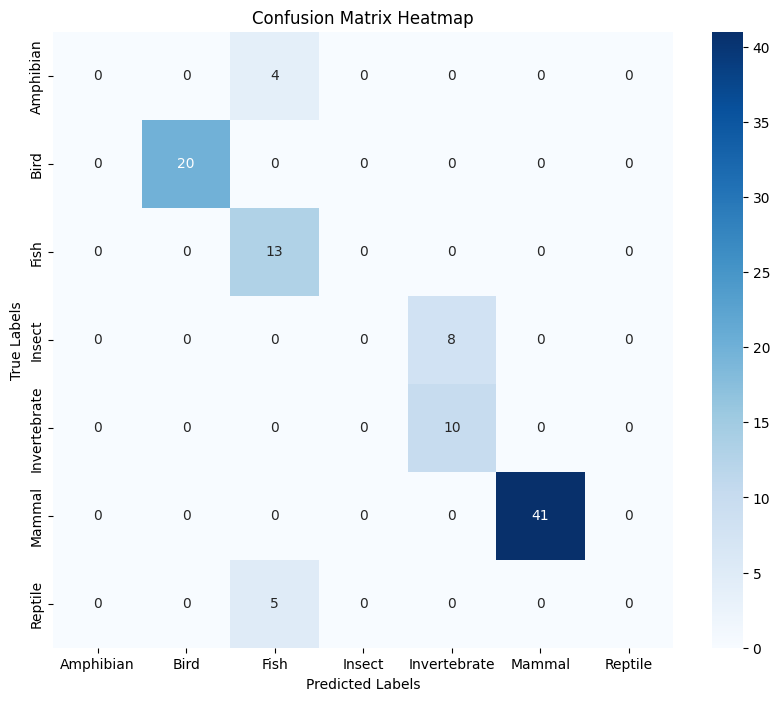

Classification Report:
              precision    recall  f1-score   support

   Amphibian       0.00      0.00      0.00         4
        Bird       1.00      1.00      1.00        20
        Fish       0.59      1.00      0.74        13
      Insect       0.00      0.00      0.00         8
Invertebrate       0.56      1.00      0.71        10
      Mammal       1.00      1.00      1.00        41
     Reptile       0.00      0.00      0.00         5

    accuracy                           0.83       101
   macro avg       0.45      0.57      0.49       101
weighted avg       0.74      0.83      0.77       101

Class Amphibian has 4 misclassifications.
Class Insect has 8 misclassifications.
Class Reptile has 5 misclassifications.


In [28]:
class_names = ['Amphibian', 'Bird', 'Fish', 'Insect', 'Invertebrate', 'Mammal', 'Reptile']

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification metrics
y_true = []
y_pred = []
for i, row in enumerate(conf_mat):
    y_true += [i] * sum(row)
    y_pred += list(np.repeat(range(len(row)), row))
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Analyze misclassifications
misclassified = conf_mat - np.diag(np.diagonal(conf_mat))
misclassified_counts = np.sum(misclassified, axis=1)
for i, count in enumerate(misclassified_counts):
    if count > 0:
        print(f"Class {class_names[i]} has {count} misclassifications.")


### <span style="color:cyan;"><i>Your answer Here</i></span>

The confusion matrix reveals the following insights:

1. **Accuracy and Class Distribution**:
   - The overall accuracy is **83%**, indicating that the model correctly predicted most classes.
   - High-performing classes include **Bird** and **Mammal**, both achieving a precision, recall, and F1-score of **1.0**.

2. **Challenges in Classification**:
   - **Amphibian**, **Insect**, and **Reptile** classes show poor performance, with **0% recall**, meaning none of these instances were classified correctly.
   - Amphibians were all misclassified as Fish, while Reptiles were also heavily misclassified as Fish.

3. **Quantified Misclassifications**:
   - **Amphibian**: 4 misclassifications (all predicted as Fish).
   - **Insect**: 8 misclassifications (all predicted as Invertebrate).
   - **Reptile**: 5 misclassifications (all predicted as Fish).

4. **Class Performance Summary**:
   - **Fish** and **Invertebrate** have moderate performance with F1-scores of **0.74** and **0.71**, respectively.
   - The macro-average metrics (**Precision: 0.45**, **Recall: 0.57**, **F1-score: 0.49**) suggest uneven performance across classes.

### Conclusion

The model performs well for the dominant classes (**Bird** and **Mammal**) but struggles with smaller or less distinct classes like **Amphibian**, **Insect**, and **Reptile**. This imbalance suggests potential improvements, such as increasing the representation of these underperforming classes in the training data or using techniques to handle class imbalance more effectively.


We can also show another quality measure, like the **recall**. To do that, we can use the parameter *scoring = *.

In [29]:
kf=KFold(n_splits=10)
scores = cross_val_score(clf, features, class_feature, cv=kf, scoring='recall_weighted')
scores

array([1. , 0.7, 0.6, 0.8, 0.9, 0.8, 0.8, 0.6, 0.7, 0.8])

### Exercise 4 (5 points)

Compute the accuracy, precision, and recall scores for knn and decision tree on the wine dataset (*winequality-red.csv*). Which model is better for this dataset? Remember to use the KFold validation to compute the metrics. Remember that the wines dataset was used as a *challenge* for the classification task.

In [30]:
# Here your code
# Load the wine dataset
wine_df = pd.read_csv('data/winequality-red.csv', sep=";")

# Prepare the feature and target vectors
wine_features = wine_df.drop('quality', axis=1).values
wine_target = wine_df['quality'].values

# Initialize the models
knn_model = KNeighborsClassifier(n_neighbors=3)
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Initialize KFold
kf = KFold(n_splits=10)

# Compute accuracy, precision, and recall for KNN
knn_accuracy = cross_val_score(knn_model, wine_features, wine_target, cv=kf, scoring='accuracy').mean()
knn_precision = cross_val_score(knn_model, wine_features, wine_target, cv=kf, scoring='precision_weighted').mean()
knn_recall = cross_val_score(knn_model, wine_features, wine_target, cv=kf, scoring='recall_weighted').mean()

# Compute accuracy, precision, and recall for Decision Tree
tree_accuracy = cross_val_score(tree_model, wine_features, wine_target, cv=kf, scoring='accuracy').mean()
tree_precision = cross_val_score(tree_model, wine_features, wine_target, cv=kf, scoring='precision_weighted').mean()
tree_recall = cross_val_score(tree_model, wine_features, wine_target, cv=kf, scoring='recall_weighted').mean()

# Print the results
print("KNN - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(knn_accuracy, knn_precision, knn_recall))
print("Decision Tree - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(tree_accuracy, tree_precision, tree_recall))

# Determine which model is better
if tree_accuracy > knn_accuracy:
    print("Decision Tree is better for this dataset.")
else:
    print("KNN is better for this dataset.")

KNN - Accuracy: 0.43, Precision: 0.44, Recall: 0.43
Decision Tree - Accuracy: 0.55, Precision: 0.51, Recall: 0.55
Decision Tree is better for this dataset.


## Quality metrics for Clustering

Now, it is time to measure the quality of our clusters. In this lab, we will use the silhouette metric, which varies between -1 and 1. The clustering is good if the silhouette result is close to 1. It is important to note that the silhouette considers cohesion and separation. Of course, we can calculate other metrics like the Calinski Harabasz and the Davies Bouldin. Please refer to the main course slides to understand how these metrics should be interpreted. We start by importing the libraries.

In [31]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

We will use the well-known dataset called iris.csv in this part but without the class column. This dataset belongs to this lab. 

In [32]:
data_iris = pd.read_csv('data/iris.csv')
data_iris.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now, we can use some of the clustering techniques. For instance, we can use KMeams with $k=3$, which uses the partition strategy. 

In [33]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=3)
clusters.fit(data_iris)

KMeans(n_clusters=3)

Before calculating the quality metrics, we must extract labels (cluster names) computed by KMeans. Then, the calculation of the quality metrics for clustering (unsupervised learning) is as simple as calling the methods.

In [34]:
label = clusters.fit_predict(data_iris)
metrics.silhouette_score(data_iris, label, metric='euclidean')

0.5525919445499757

In [35]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data_iris, clusters.labels_)

560.3999242466402

In [36]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(data_iris, clusters.labels_)

0.662322864989869